## importing dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## data colllection and alalysis

In [3]:
# loading the data from csv to pandas data frame
insurence_data=pd.read_csv(r"C:\Users\USER\Downloads\insurance.csv")

In [4]:
# first 5 rows of the data frame
insurence_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# num of rows and columns
insurence_data.shape

(1338, 7)

In [6]:
# getting some informationn about the data
insurence_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### categorical columns
#### --sex
#### --smoker
#### --region

In [7]:
# check for missing values 
insurence_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Analysis

In [8]:
# statistical measures of the dataset
insurence_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\USER\AppData\Local\Temp\ipykernel_13216\443821102.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurence_data['age'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


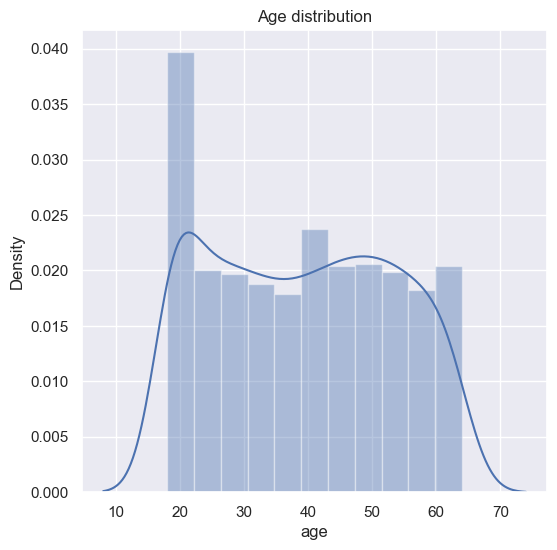

In [9]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurence_data['age'])
plt.title('Age distribution')
plt.show()

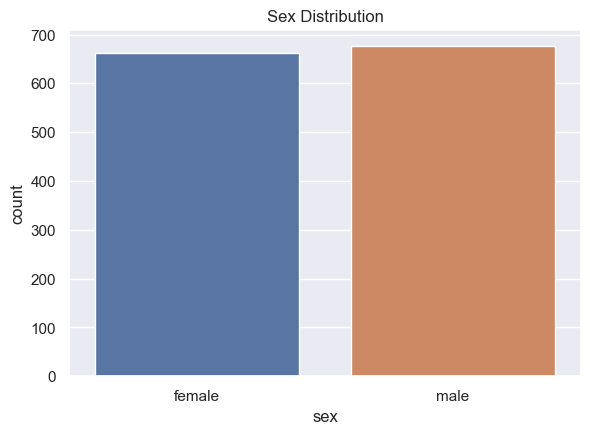

In [10]:


# Assuming insurence_data is already defined and contains a 'sex' column
plt.figure(figsize=(6.6, 4.5))  # Corrected figsize
sns.countplot(x='sex', data=insurence_data)
plt.title('Sex Distribution')
plt.show()

In [11]:
insurence_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_13216\3851023162.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurence_data['bmi'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


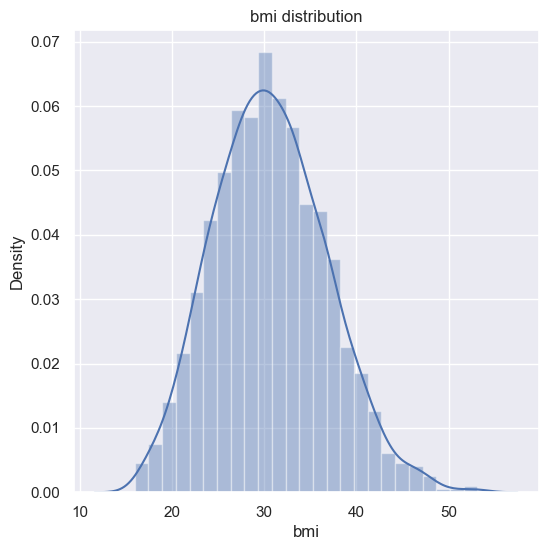

In [12]:

# distribution of bmi value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurence_data['bmi'])
plt.title('bmi distribution')
plt.show()

### normal bmi range ----> 18.5 to 24.9

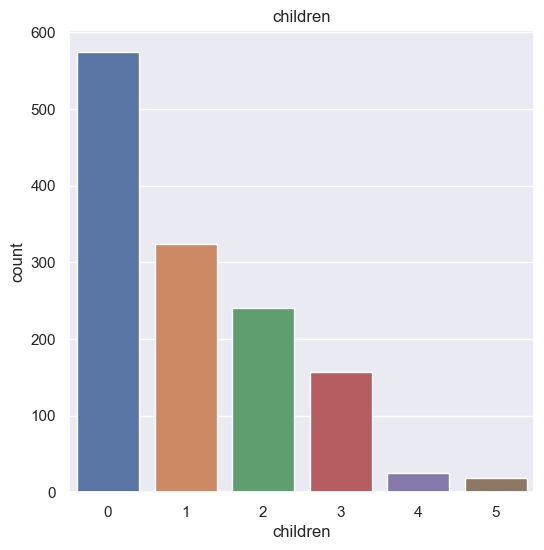

In [14]:
# children column 
plt.figure(figsize =(6,6))
sns.countplot(x='children',data=insurence_data)
plt.title('children')
plt.show()

In [16]:
insurence_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

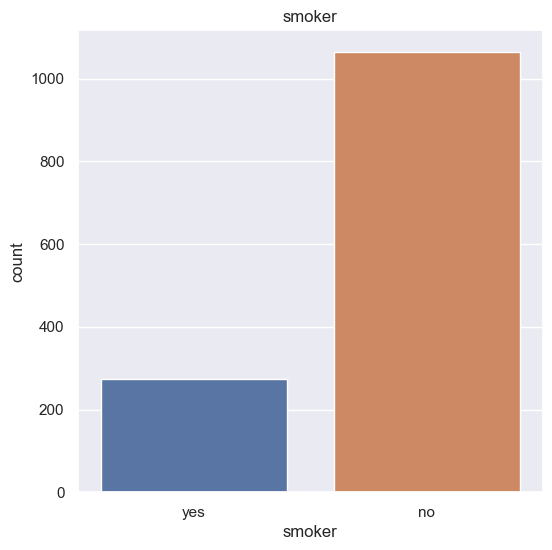

In [17]:
# smoker column 
plt.figure(figsize =(6,6))
sns.countplot(x='smoker',data=insurence_data)
plt.title('smoker')
plt.show()

In [18]:
insurence_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

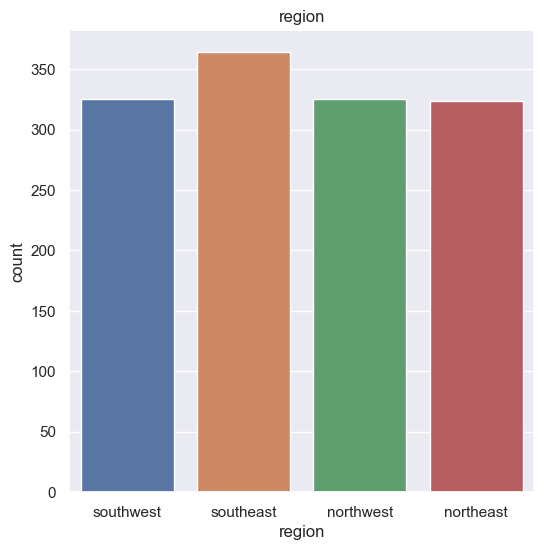

In [19]:
# region column 
plt.figure(figsize =(6,6))
sns.countplot(x='region',data=insurence_data)
plt.title('region')
plt.show()

In [20]:
insurence_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_13216\1808606809.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurence_data['charges'])
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


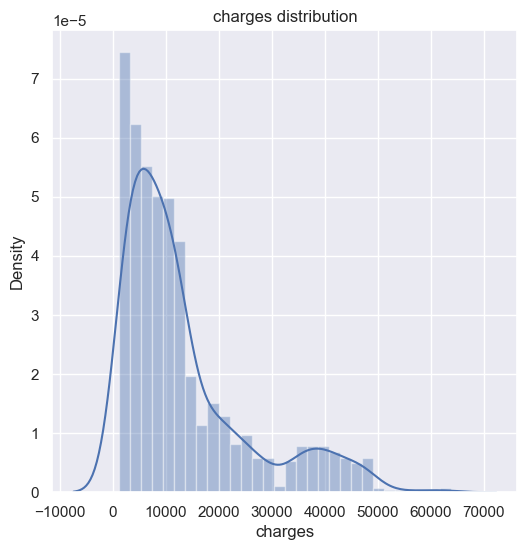

In [21]:
# distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurence_data['charges'])
plt.title('charges distribution')
plt.show()

## data preprocessing 

#### encoding the categorical features

In [23]:
# encode the sex column
insurence_data.replace({'sex':{'male':0,'female':1}},inplace=True)
# encode the smoker column
insurence_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
# encode the region column
insurence_data.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)


In [24]:
insurence_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


## splitting the features and tatget 

In [25]:
x=insurence_data.drop("charges",axis=1)
y=insurence_data['charges']

In [26]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [27]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## splitting the data into train and test data

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)


(1338, 6) (1070, 6) (268, 6)


## model training 

### linear regressiion 

In [31]:
# load the linear regression model
model=LinearRegression()

In [32]:
model.fit(x_train,y_train)

LinearRegression()

### model evaluation

In [34]:
# training data prediction 
training_data_pred=model.predict(x_train)
training_data_pred

array([  781.23289463,  9150.38548207, 13163.38600896, ...,
       17329.28768831,  9545.84287714, 14088.60244423])

In [36]:
# r2 value 
r2_train=metrics.r2_score(y_train,training_data_pred)
print('r2 value :',r2_train)

r2 value : 0.7518195459072954


In [37]:
# testing data prediction 
testing_data_pred=model.predict(x_test)
testing_data_pred

array([ 1820.75621886, 11893.35566097, 10391.48426582,  2131.62301167,
        8175.83419518, 11016.30531453,  3352.18872713,  1013.79352548,
       12023.09477086,  9453.8581105 , 11467.3225898 ,  4817.664947  ,
       29808.20461479,  -513.75717634, 12754.46439804, 13119.43189556,
        4118.83414354,  7731.48626043, 29297.74067135,  2699.14570484,
       12329.22054394,  2214.5652979 , 34452.34192694, 32066.24540146,
       30224.63592129,  8944.2429203 ,  2230.70212755, 15188.75659902,
        6532.69778856,  1906.71098074,  9402.89455638,  5634.95908593,
        4371.49314151,  4823.49011099,  9453.52337493,  4528.76526399,
       29818.9763023 ,  6751.3046149 , 27557.85321987, 13878.30367427,
         117.41861964, 28385.96859962,  7697.94328125,  1430.2691451 ,
       10187.26558274,  7986.59837739, 11431.85182879,  8096.73882633,
       10698.62941741, 13781.02808991,  6083.58400067,  -813.98261125,
       26175.82891349, 37020.38968178,  7319.63150011, 17878.3155211 ,
      

In [38]:
# r2 value 
r2_test=metrics.r2_score(y_test,testing_data_pred)
print('r2 value :',r2_test)

r2 value : 0.7454471618659975


## build a predictive system

In [40]:
input_data=(52,1,30.78,1,1,3)

# change the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshape)

print('the insurence cost USD ',prediction)

the insurence cost USD  [12041.59498574]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
# 37,male,30.8,0,no,southwest,4646.759
input_data=( 37,0,30.8,0,1,1)

# change the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=model.predict(input_data_reshape)

print('the insurence cost USD ',prediction)

the insurence cost USD  [7086.03195936]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
